<a href="https://colab.research.google.com/github/Jaise152/TimeSeriesAnalysis/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Jaise152/TimeSeriesAnalysis/main/monthly-car-sales.txt')

In [13]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [14]:
# summarize shape
print(df.shape)

(108, 2)


In [15]:
# show first few rows
print(df.head())

     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


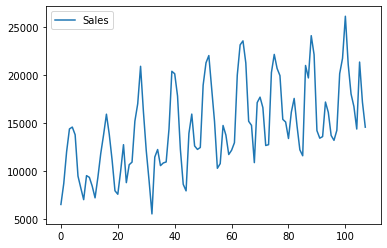

In [19]:
df.plot()
pyplot.show()

In [21]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [24]:
# define the model
model = Prophet()

In [25]:
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [34]:
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [35]:
# use the model to make a forecast
forecast = model.predict(future)

In [36]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12661.438523  15828.606531
1 1968-02-01  14905.955964  13264.091257  16390.652678
2 1968-03-01  20842.150502  19273.309389  22587.207469
3 1968-04-01  22870.095215  21255.540965  24520.035575
4 1968-05-01  24176.211162  22652.377646  25922.916998


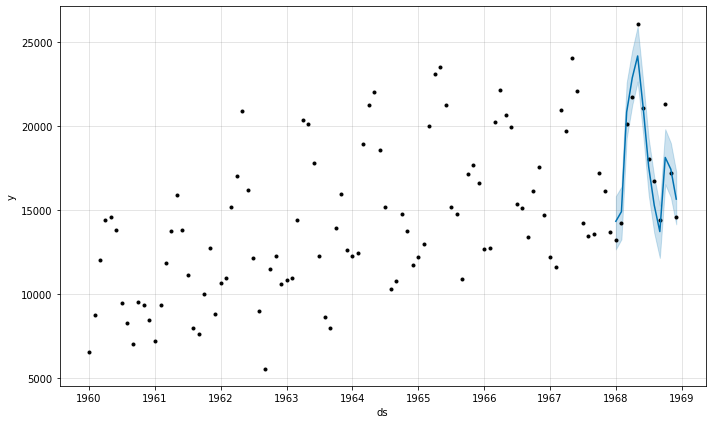

In [37]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [39]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [40]:
# use the model to make a forecast
forecast = model.predict(future)

In [41]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13802.288088  16888.064625
1 1969-02-01  16142.271673  14601.205424  17810.505592
2 1969-03-01  21351.832640  19798.070464  23042.274990
3 1969-04-01  23477.889811  21879.030124  25115.333518
4 1969-05-01  24988.440907  23397.030208  26603.365186


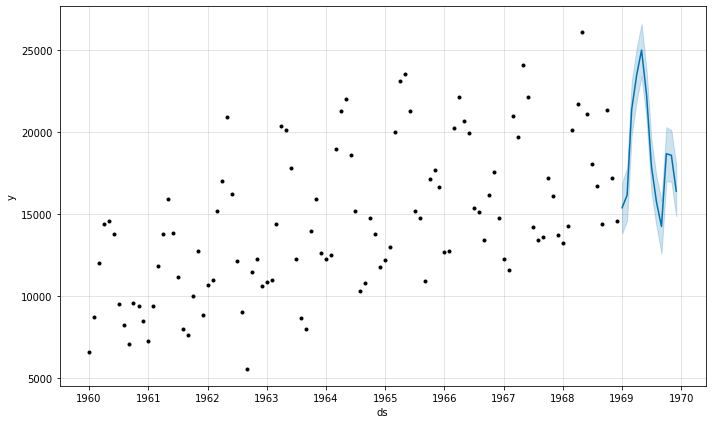

In [42]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [43]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [46]:
...
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1369.485


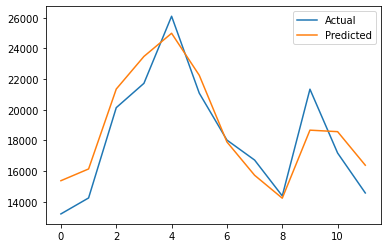

In [47]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()